# Nilearn Plotting tools by Anton Leontyev and Charles Zhang

In [1]:
from nilearn import plotting
from nilearn import datasets
from scipy import stats
from nilearn import image
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Plan:    

    1)Fetching the data; introduction to fMRI terms
    2)Anatomical images
    3)Plotting activation maps on the brain
    4)Plotting a connectome
    5)EPI images
    6)Saving to a file
    
<img src="files/image.jpeg">

## fMRI data


For these examples, we will use fMRI scans, collected from anonymous participants peforming different tasks.

Resting-state - when participant is not performing any explicit task.

BOLD contrast imaging - Blood-oxygen-level dependent contrast imaging; imaging the differences in magnetic fields brought by influx of blood to a certain area (blood has ferromagnetic properties).

Statistical map - map of activity in different voxels (volume units of the brain).

Threshold - intensity threshold for the basic signal level.



In [2]:
#Fetch the dataset


# localizer dataset to have contrast maps
subject1 = datasets.fetch_localizer_button_task()
subject1_tmap = subject1.tmaps[0]
#atlas 
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
# functional dataset
func1 = ("/home/agleontiev/Desktop/func.nii")

#anatomical image
anat_example = ("/home/agleontiev/Desktop/anat.nii")

### Anatomical images

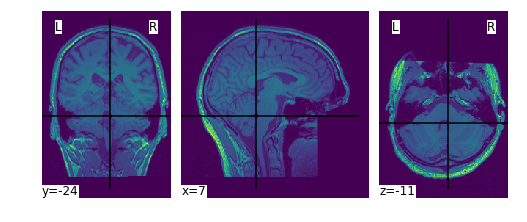

In [3]:
plotting.plot_img(anat_example)

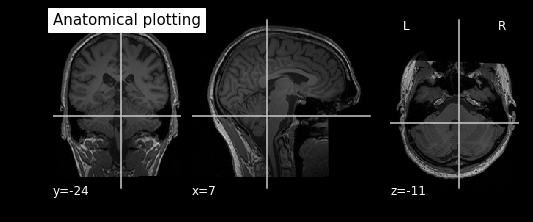

In [4]:
plotting.plot_anat(anat_example, title="Anatomical plotting")

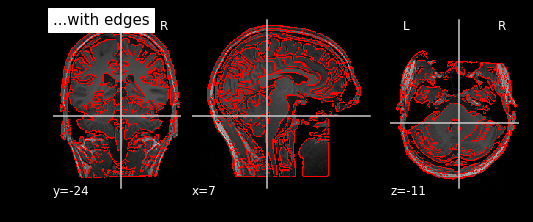

In [5]:
display = plotting.plot_anat(anat_example, title="...with edges")
display.add_edges(anat_example)

### Plotting activation maps on the brain

Nilearn has abilities to plot in many different modes. These different modes are specified through the argument “display_mode”. Possible values are ‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’.  

‘x’ - sagittal, ‘y’ - coronal, ‘z’ - axial, ‘l’ - sagittal left hemisphere only, ‘r’ - sagittal right hemisphere only, ‘ortho’ - three cuts are performed in orthogonal directions.

Another argument is transparency (indicated by alpha - a float from 0 to 1). This is in charge of brain schematics transparency.



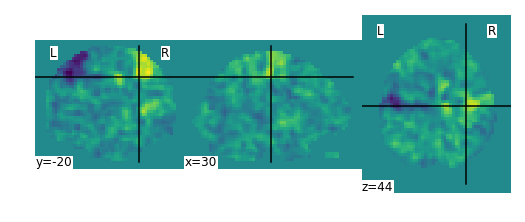

In [6]:
plotting.plot_img(subject1_tmap)

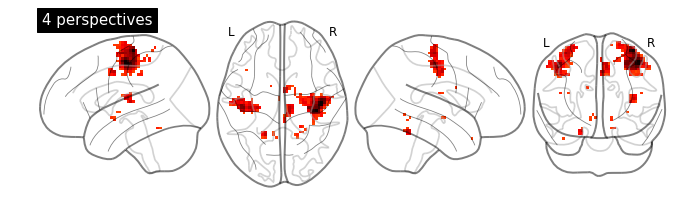

In [7]:
#saggital left hemisphere, axial, saggital right hemisphere, coronal

plotting.plot_glass_brain(subject1_tmap,
                          title='4 perspectives',
                          display_mode='lzry', threshold=3, alpha = 0.5)

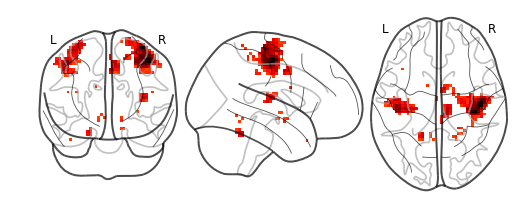

In [8]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'ortho')

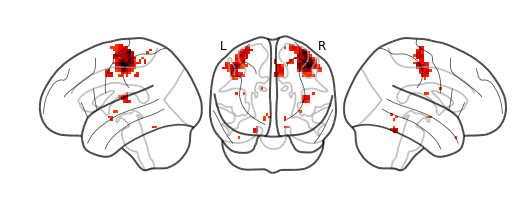

In [9]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'lyr')

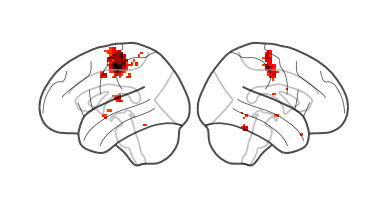

In [10]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'lr')

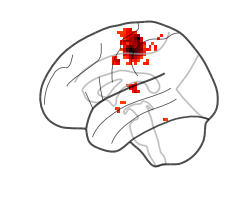

In [11]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, display_mode = 'l')

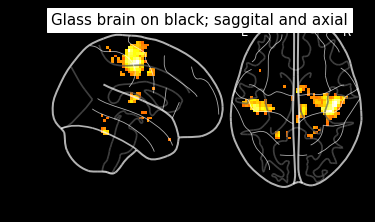

In [13]:
plotting.plot_glass_brain(
    subject1_tmap, title='Glass brain on black; saggital and axial',
    black_bg=True, display_mode='xz', threshold=3)

Let's add the colorbar:

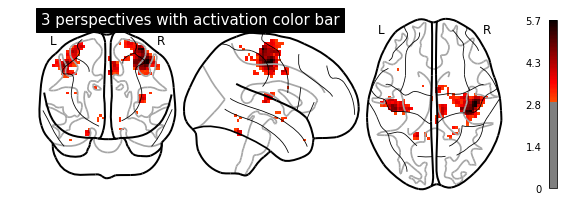

In [14]:
plotting.plot_glass_brain(subject1_tmap, display_mode = 'ortho', threshold=3, colorbar=True, title = '3 perspectives with activation color bar', alpha = 1)

Plot_abs is a little tricky. This argument is describing how you want to handle the activation. If True, projection of the absolute value will be used (rendering positive and negative values in the same manner). If False, then the sign of the maximum intensity will be represented with different colors.

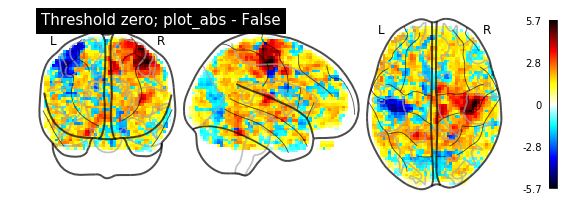

In [15]:
#plot_abs is set to 'False'.
plotting.plot_glass_brain(subject1_tmap, threshold=0, colorbar=True,
                          plot_abs=False, title='Threshold zero; plot_abs - False')

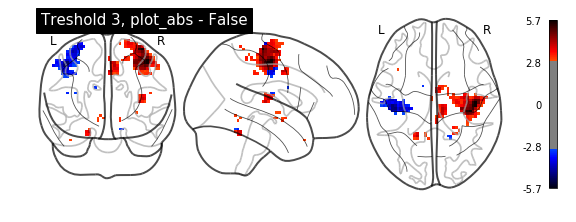

In [16]:
plotting.plot_glass_brain(subject1_tmap, threshold=3, title ='Treshold 3, plot_abs - False',
                          colorbar=True, plot_abs=False)

If we want to plot the contours of our activation regions, we first have to initialize the image, and THEN add countours.

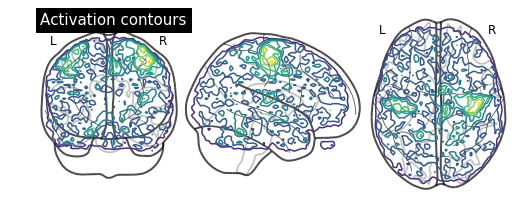

In [17]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps
display.add_contours(subject1_tmap)
# and a title
display.title('Activation contours')

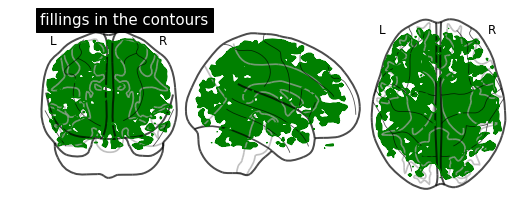

In [18]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps with filled=True
display.add_contours(subject1_tmap, filled=True, levels =[1.5], colors = 'g', alpha = 1)
#levels denote the level of activation. if set to zero, everything will be colored
display.title('fillings in the contours')

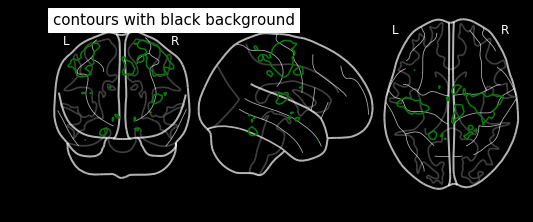

In [19]:
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(subject1_tmap, levels=[3.], colors='g')
display.title('contours with black background')

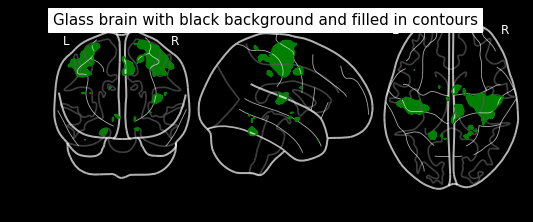

In [20]:
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(subject1_tmap, filled=True, levels=[3.], colors='g', alpha = 1)
display.title('Glass brain with black background and filled in contours')

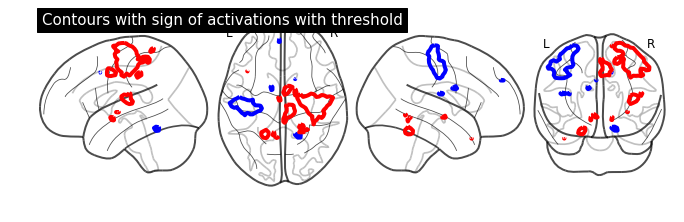

In [21]:
import numpy as np
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')

# In add_contours,
# we give two values through the argument `levels` which corresponds to the
# thresholds of the contour we want to draw: One is positive and the other one
# is negative. We give a list of `colors` as argument to associate a different
# color to each contour. Additionally, we also choose to plot contours with
# thick line widths, For linewidths one value would be enough so that same
# value is used for both contours.
display.add_contours(subject1_tmap, levels=[-2.8, 3.], colors=['b', 'r'],
                     linewidths=4.)
display.title('Contours with sign of activations with threshold')

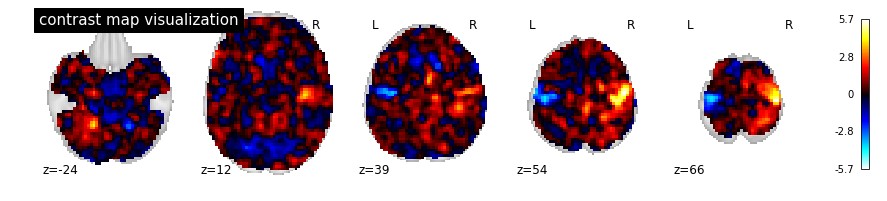

In [22]:
plotting.plot_stat_map(subject1_tmap, display_mode='z', cut_coords=5,
                       title="contrast map visualization")

### Plotting a connectome

A connectome is a  map of neural connections in the brain, and may be thought of as its "wiring diagram".

In [23]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(func1)

[NiftiMapsMasker.fit_transform] loading regions from /home/agleontiev/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________resample_img cache loaded - 0.4s, 0.0min
[Memory]    0.6s, 0.0min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


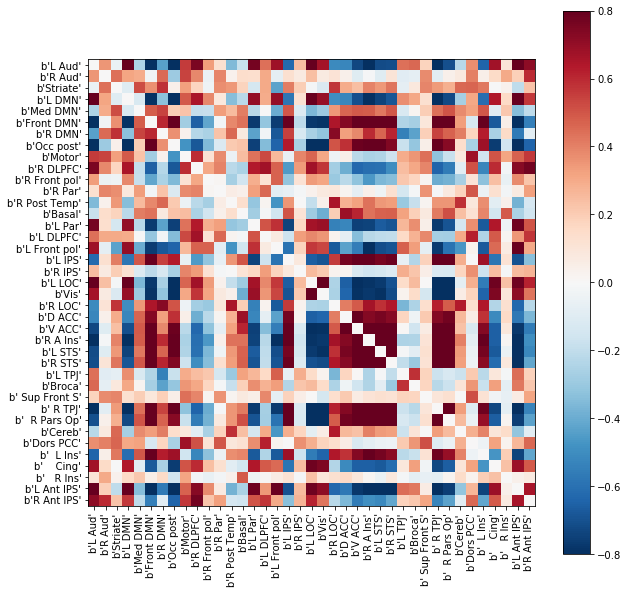

In [24]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plt.imshow(correlation_matrix, interpolation="nearest", cmap="RdBu_r",
           vmax=0.8, vmin=-0.8)
plt.colorbar()
# And display the labels
x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
y_ticks = plt.yticks(range(len(labels)), labels)

Plotting connectome on the brain:

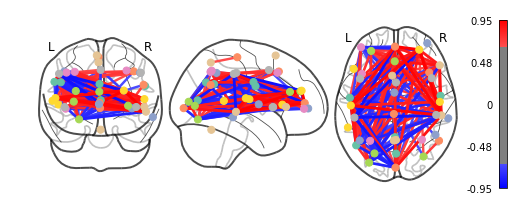

In [25]:
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

### EPI images and smoothing.
While MRI as conventionally practiced builds up the data for an image from a series of discrete signal samples, EPI is a method to form a complete image from a single data sample, or a single "shot".

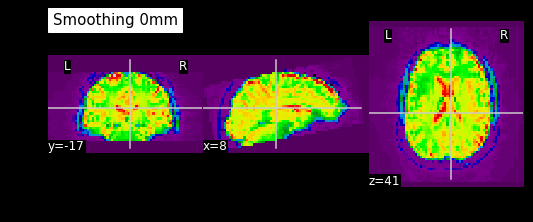

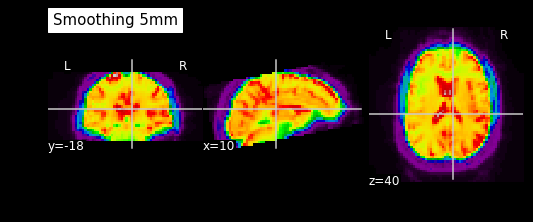

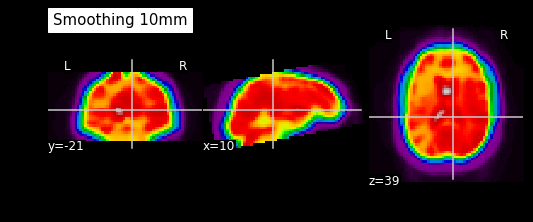

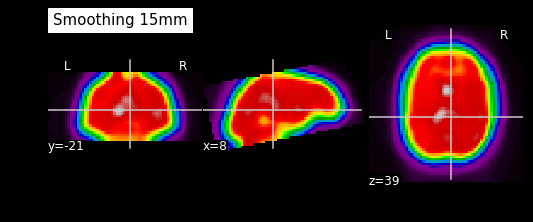

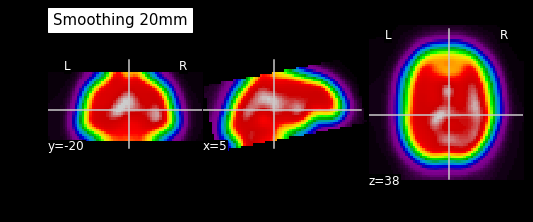

In [26]:
mean_func = image.mean_img(func1)

# Then we smooth, with a varying amount of smoothing, from none to 20mm
# by increments of 5mm
for smoothing in range(0, 25, 5):
    smoothed_img = image.smooth_img(mean_func, smoothing)
    plotting.plot_epi(smoothed_img,
                      title="Smoothing %imm" % smoothing)